# Seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 折れ線グラフ
連続した数値の変化を表す定番グラフ。ただし、ラベルの種類数が10を超えたあたりから線が重なるなどで見づらくなる。<br>
推奨数は5で、それ以上の場合はグラフを複数に分けるほうが無難<br>
データはhttps://gist.github.com/mbostock/3884955 からのもので、ある時期の各地域の温度（°F）の関係図

In [3]:
df = pd.read_csv(
    'data/plot.csv',
    index_col='date',
    parse_dates=True,
    date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d')
    )  # yyyymmdd -> yyyy-mm-ddに変換

df.head()

,New York,San Francisco,Austin
date,,,
2011-10-01,63.4,62.7,72.2
2011-10-02,58.0,59.9,67.7
2011-10-03,53.3,59.1,69.4
2011-10-04,55.7,58.8,68.0
2011-10-05,64.2,58.7,72.4


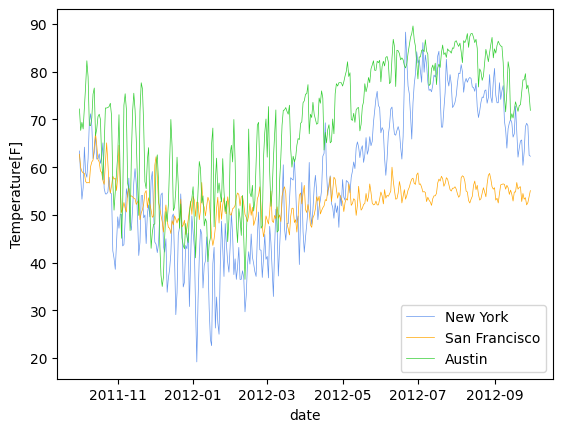

In [4]:
fig, ax = plt.subplots()
colors = ['cornflowerblue', 'orange', 'limegreen']

for i, city in enumerate(df.columns):
    sns.lineplot(
        df[city],
        color=colors[i],
        linewidth=0.5,
        label=df.columns[i]
        )

plt.ylabel('Temperature[F]')
ax.legend()
plt.subplots_adjust(hspace=0.4)
plt.show()

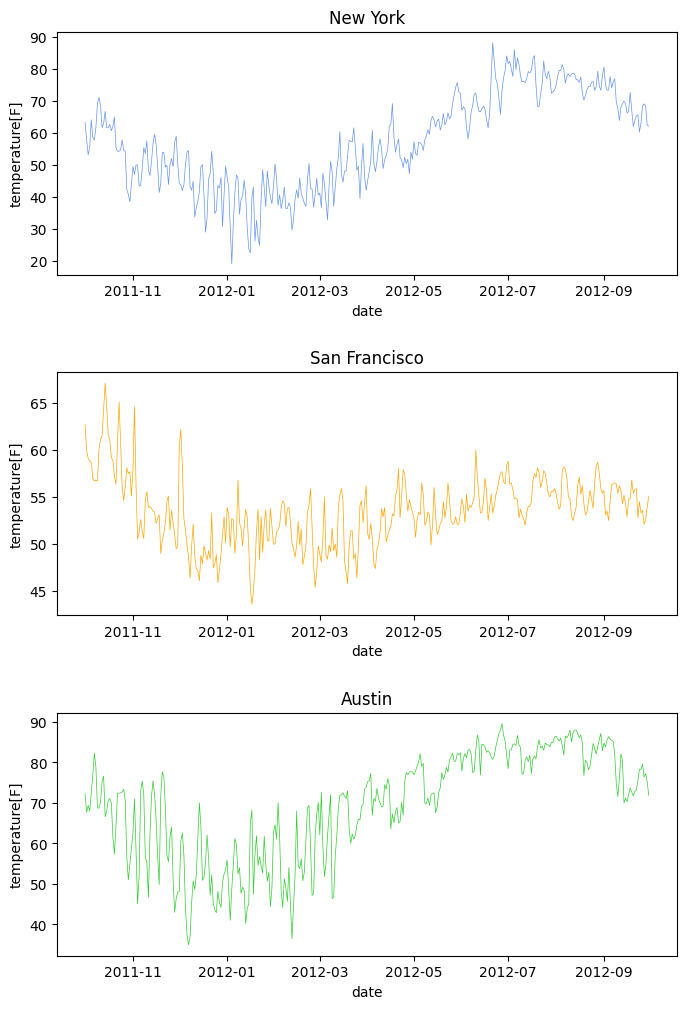

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
colors = ['cornflowerblue', 'orange', 'limegreen']
for i, city in enumerate(df.columns):
    sns.lineplot(
        df[city],
        ax=ax[i],
        color=colors[i],
        linewidth=0.5
        )
    ax[i].set_ylabel('temperature[F]')
    ax[i].set_title(city)
plt.subplots_adjust(hspace=0.4)
plt.show()

In [6]:
# seaborn.objectを利用
import seaborn.objects as so

df_so = pd.read_csv(
    filepath_or_buffer='data/plot.csv',
    index_col=None, 
    parse_dates=['date'],
    date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d')
    )  # yyyymmdd -> yyyy-mm-ddに変換

df_so = df_so.melt(
    id_vars=['date'],
    var_name='City',
    value_name='Temperature[°F]')

df_so.head()

,date,City,Temperature[°F]
0,2011-10-01,New York,63.4
1,2011-10-02,New York,58.0
2,2011-10-03,New York,53.3
3,2011-10-04,New York,55.7
4,2011-10-05,New York,64.2


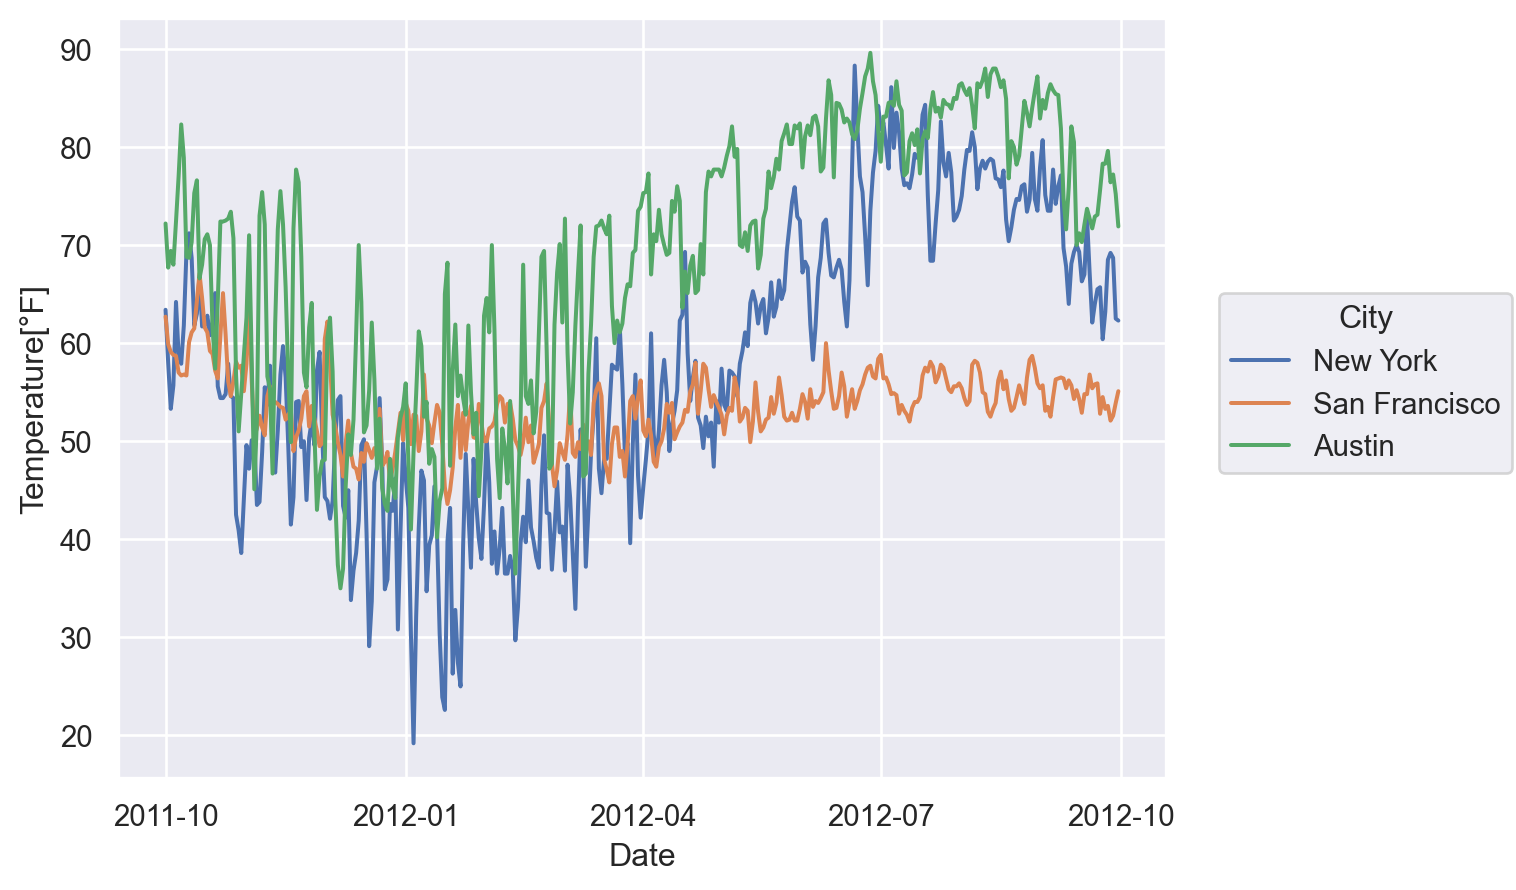

In [12]:
p = (so.Plot(data=df_so,
             x='date',
             y='Temperature[°F]',
             color='City')
    .add(so.Line())
    .label(x='Date', y='Temperature[°F]')
)
p

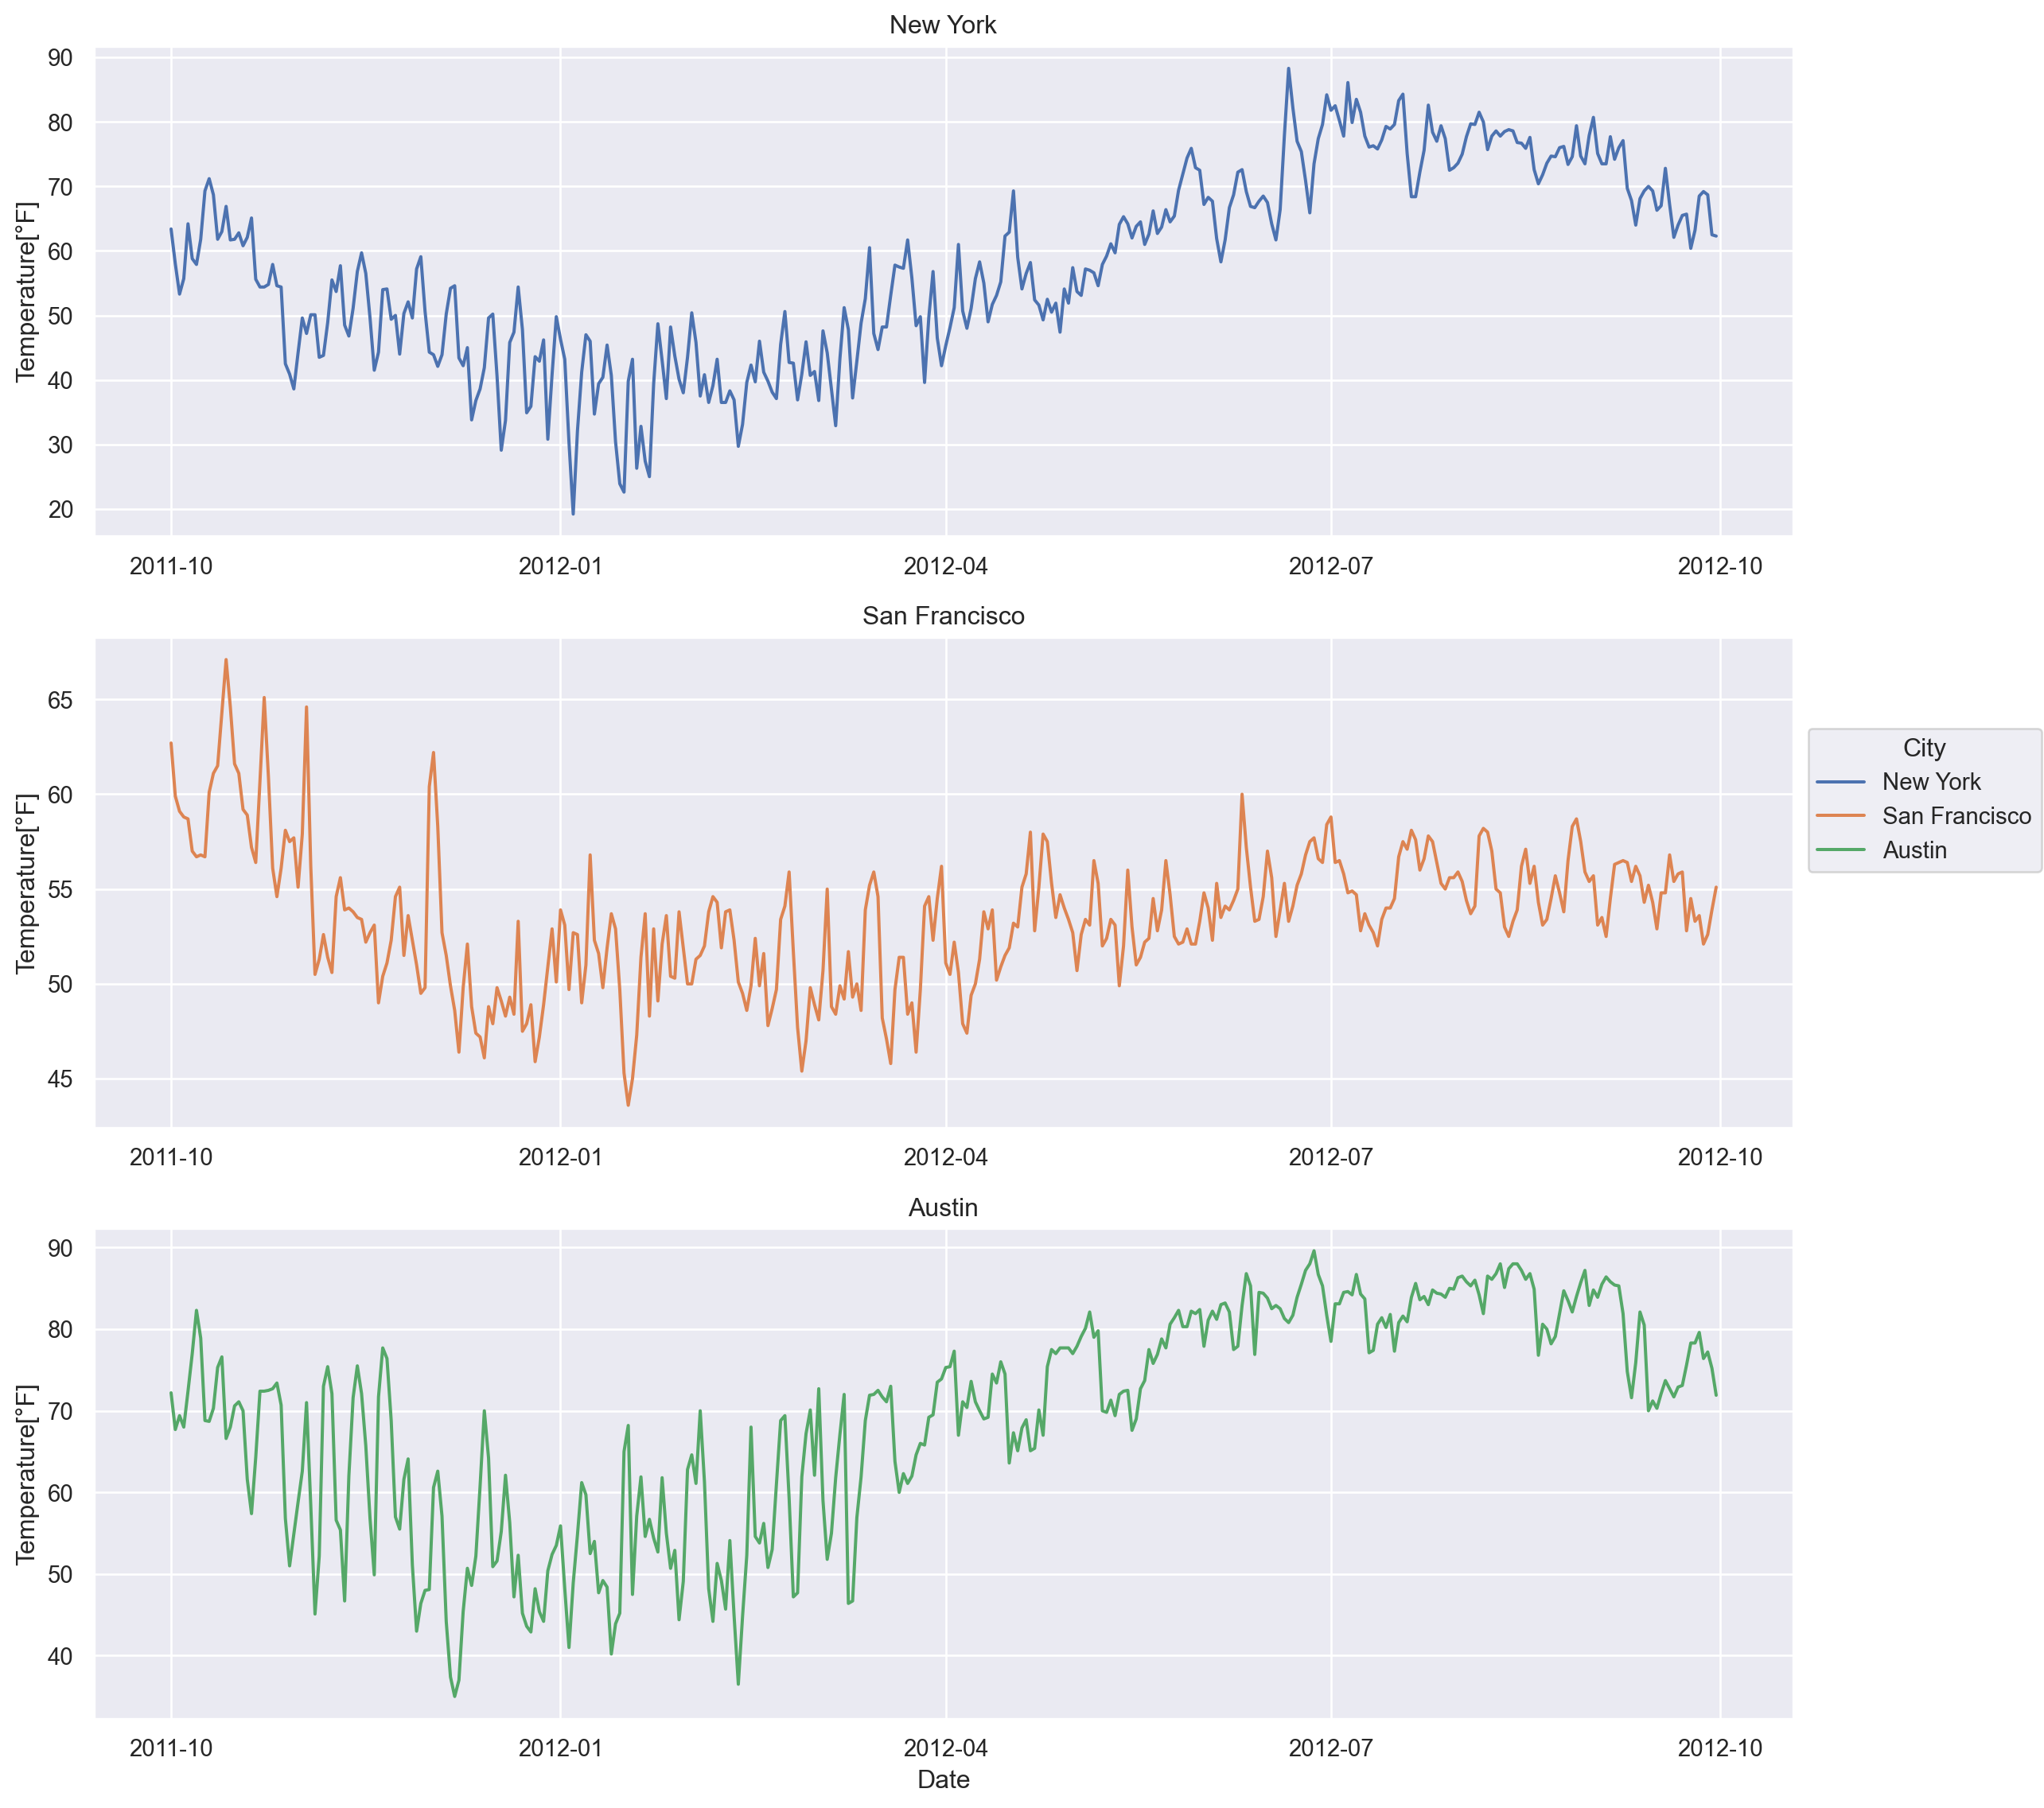

In [15]:
p = (
    so.Plot(
        data=df_so,
        x='date',
        y='Temperature[°F]',
        color='City')
    .add(so.Line())
    .label(x='Date', y='Temperature[°F]')
    .facet(row='City')
    .share(x=False, y=False)
    .layout(size=(12, 12))
)
p

# 散布図
2つの数値を座標として捉えたときのデータの偏りを調べる方法。1つの系列が自国の場合はX軸を時刻に割り当てる場合が多い。3つめの数値があるときは点の代償などで大小を表現することができる。ただし、見る人が対象となるラベルを見つけなければならないため、折れ線グラフや時系列ヒートマップのように時間的な数値の増減を表現するのは苦手。あくまで、「どこに偏りがあるか？」を見るのに使う。<br>
データはボストンの住宅価格データセットを用いた。
- CRIM： 町別の「犯罪率」
- ZN： 25,000平方フィートを超える区画に分類される住宅地の割合＝「広い家の割合」
- INDUS： 町別の「非小売業の割合」
- CHAS： チャールズ川のダミー変数（区画が川に接している場合は1、そうでない場合は0）＝「川の隣か」
- NOX： 「NOx濃度（0.1ppm単位）」＝一酸化窒素濃度（parts per 10 million単位）。この項目を目的変数とする場合もある
- RM： 1戸当たりの「平均部屋数」
- AGE： 1940年より前に建てられた持ち家の割合＝「古い家の割合」
- DIS： 5つあるボストン雇用センターまでの加重距離＝「主要施設への距離」
- RAD： 「主要高速道路へのアクセス性」の指数
- TAX： 10,000ドル当たりの「固定資産税率」
- PTRATIO： 町別の「生徒と先生の比率」
- B： 「1000(Bk - 0.63)」の二乗値。Bk＝「町ごとの黒人の割合」を指す
- LSTAT： 「低所得者人口の割合」
- MEDV：「住宅価格」（1000ドル単位）の中央値。通常はこの数値が目的変数として使われる

In [189]:
df = pd.read_csv('data/scatter.csv')
# その地域の住宅の平均部屋数と低所得者数から住宅価格との関連性を確認する
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


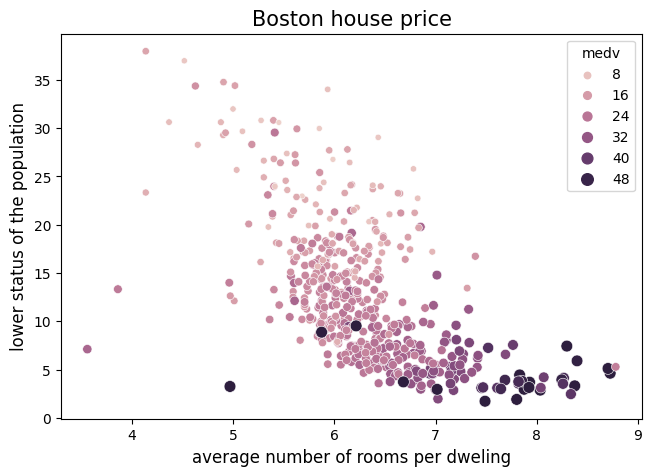

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5))
ax.set_title('Boston house price', fontsize=15)
ax.set_xlabel('average number of rooms per dweling', fontsize=12)
ax.set_ylabel('lower status of the population', fontsize=12)
sns.scatterplot(x='rm', y='lstat', data=df, size='medv', hue='medv')
plt.show()

こんなこともできる

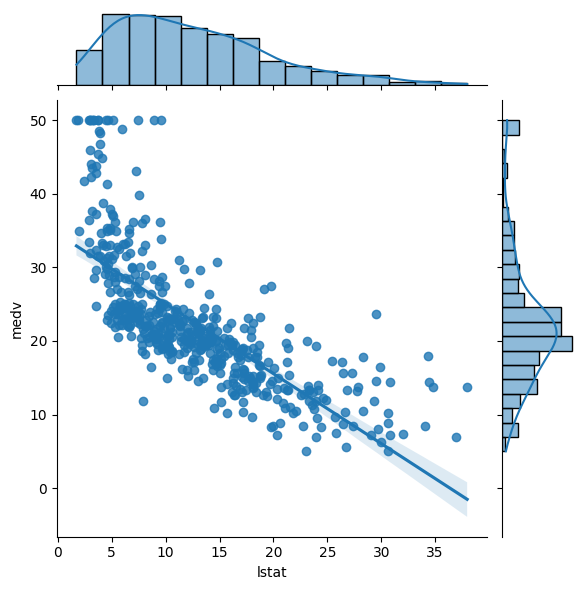

In [60]:
# jointplotでヒストグラム付きの散布図を作成可能
sns.jointplot(x='lstat', y='medv', data=df, kind='reg')  # 回帰直線を引く
plt.show()

# ヒートマップ
数値2つを座標として、3つ目の数値をその座標の色を決定するために使うことで、全体の数値のバラつきや、高い・低い値の集中しているエリアを知ることができる。数値の代わりに時刻にすることもできなくはないが、あまりそういうグラフは見たことがない。<br>
データはhttps://github.com/mwaskom/seaborn-data/blob/master/flights.csv からのもので、各年の各月における飛行機の乗客数

In [190]:
df = pd.read_csv('data/heatmap.csv')
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


<AxesSubplot: >

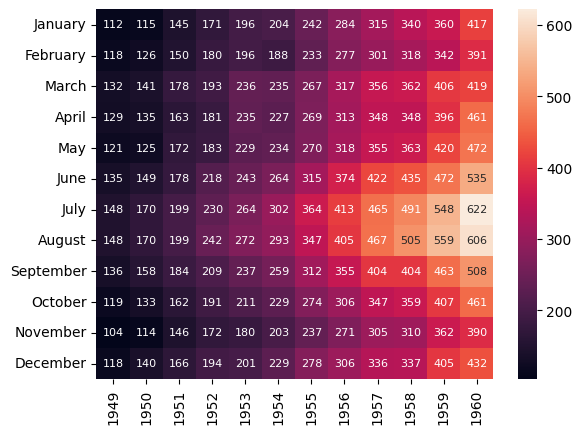

In [69]:
year = df['year'].unique()
month = df['month'].unique()
passengers = df['passengers'].to_numpy().reshape(month.size, year.size).T
sns.heatmap(
    passengers,
    annot=True,
    annot_kws={'size': 8},
    fmt='d',  # フォーマット：整数
    linewidths=0,
    linecolor='white',
    cbar=True,
    xticklabels=year,
    yticklabels=month
    )

相関マップはこの通り

In [191]:
df_corr = pd.read_csv('data/scatter.csv')
df_corr.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


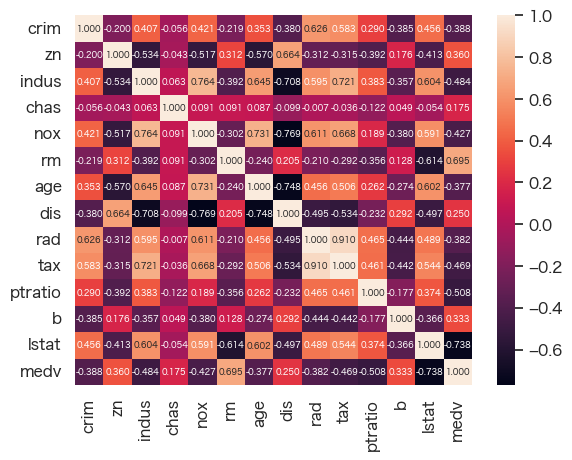

In [186]:
corr = np.corrcoef(df_corr.values.T)
sns.heatmap(
    corr,
    annot=True,
    annot_kws={'size': 6},
    fmt='.3f',  # 小数点以下3桁
    linewidths=0,
    linecolor='white',
    cbar=True,
    xticklabels=list(df_corr.columns),
    yticklabels=list(df_corr.columns)
    )
plt.show()

# 積み重ね棒グラフ/集合棒グラフ
2つのラベルと1つの数値があったときに、これらの数値の大小を比較する方法。2つ以上のラベルをうまく表現できる数少ない方法だと思うが、データ数（≒2つのラベルの組み合わせ数）が50を超えたぐらいから図が煩雑になって読み取りが難しくなってしまう。<br>
データはhttps://www.enecho.meti.go.jp/about/whitepaper/2014html/2-1-1.html からのもので、日本の一次エネルギー国内供給の推移である。

In [79]:
df = pd.read_csv('data/stacked_bar_chart.csv', index_col=0)
df.head()

,石油,石炭,天然ガス,原子力,水力,新エネルギー・地熱等
1965,3.56,1.87,0.08,0.00,0.75,0.11
1966,4.13,1.92,0.09,0.01,0.77,0.11
1967,5.11,2.29,0.09,0.01,0.67,0.11
1968,5.95,2.42,0.10,0.01,0.72,0.12
1969,7.19,2.59,0.12,0.01,0.73,0.13


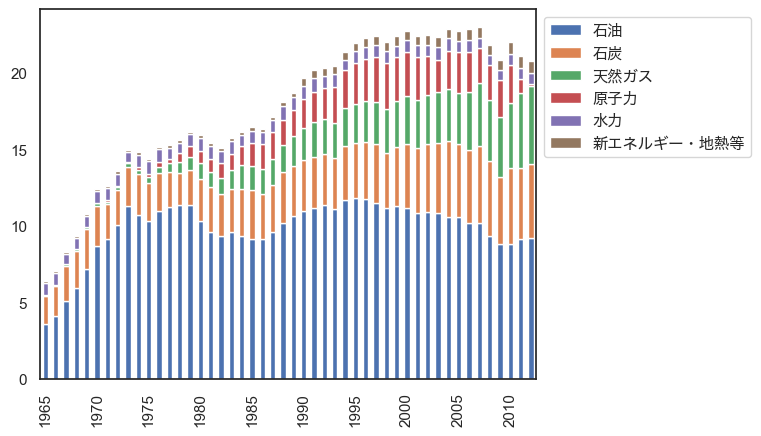

In [90]:
# bottom = np.zeros_like(df.index)
sns.set(style='white')

df.plot(kind='bar', stacked=True)
from matplotlib import ticker
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.rcParams['font.family'] = 'Hiragino sans'  # 日本語化。windowではMS GothicやMeiryoなど
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 凡例を外側に
plt.show()

# 棒グラフ

データは東京の気温情報https://smart-hint.com/tokyo-temperature/ から

In [194]:
df = pd.read_csv(
    'data/bar.csv',
    index_col=0,
    parse_dates=True,
    date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d') # 文字列から時間にする
    )
df.head()

,平均気温,最高気温,最低気温,月
日付,,,,
2021-01-01,4.4,10.5,-1.3,1
2021-01-02,4.8,10.8,0.1,1
2021-01-03,3.7,8.4,-0.4,1
2021-01-04,5.8,11.4,1.3,1
2021-01-05,6.0,10.0,2.5,1


In [195]:
bar_df = df.melt(id_vars=['月'])
bar_df.columns = ['月', '種類', '温度']
bar_df.head()

,月,種類,温度
0,1,平均気温,4.4
1,1,平均気温,4.8
2,1,平均気温,3.7
3,1,平均気温,5.8
4,1,平均気温,6.0


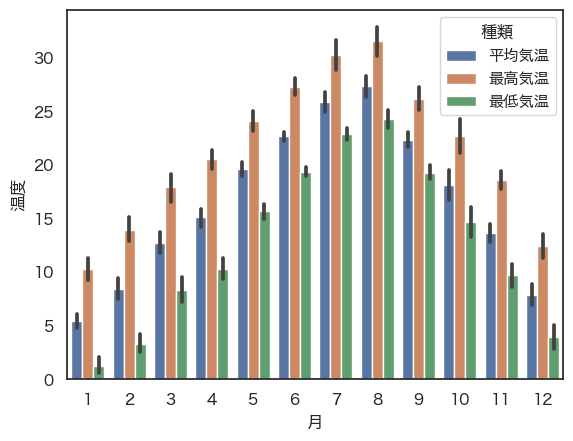

In [200]:
sns.barplot(
    data=bar_df,
    x='月',
    y='温度',
    hue='種類',
    errorbar=('ci', 95)  # 95%信頼区間のErrorBarをつける（他にも確率区間、標準誤差、標準偏差が可能）
    )
plt.show()

# 円グラフ
円グラフは、円全体を100%として、その中に占める項目の構成比を扇形で表したグラフ。扇形の面積により構成比の大小がわかる。データは、時計の針の12時の位置から時計回りに、大きい順に並べ、「その他」はいくら大きくても、一番最後に表示する。あまり扇形が小さくなるとグラフが見にくくなるので、構成比が小さいものは、まとめて「その他」にしてしまった方がよい。<br>
データはhttps://gyokai-search.com/3-tsushin.html から

Seabornではできないっぽい

# 箱ヒゲ図
データの分散をあらわすための可視化。図中では線の両端が最小値・最大値。箱の左側が第1四分位点、赤と緑の間の線が中央値、右側が第3四分位点となる。これによってラベル毎に数値のばらつきがどの程度あるか？ということを概ね理解することができる。この箱の部分が狭いほどその範囲に数値が集中していることを意味し、箱が広いほど数値がばらついていると読み取ることができる。たまに平均値を算出して棒グラフで表現するグラフを見かけるが、それだと数値が一部に集中しているのか、それともばらけているのか、ということまで分からないため、データの性質を見るという目的なら箱ひげ図のほうが望ましい。<br>
データはhttps://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/を使用

In [201]:
df = pd.read_csv('data/box_plot.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


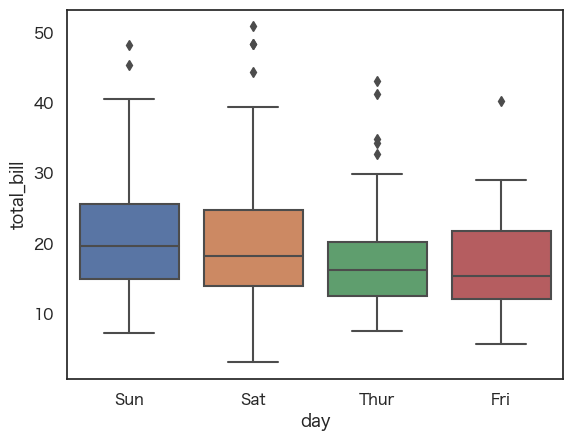

In [155]:
sns.boxplot(data=df, x='day', y='total_bill')
plt.show()

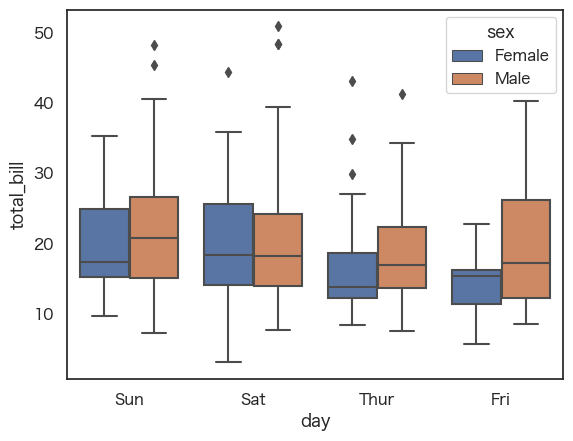

In [159]:
sns.boxplot(data=df, x='day', y='total_bill', hue='sex')
plt.show()

# ヒストグラム
箱ひげ図と同じく、どのようにデータが分散しているかを表現する可視化手法。箱ひげ図では中央値や四分位点がどこにあるかを示すだけだったが、どのヒストグラムではどの数値帯にデータが何件（または全体データ数の何%）が出現したかを表現するため、データのばらつきが克明にわかる。基本的に1系列の数値データのみしか扱えないので複数のラベルについて調べたいという場合はラベル毎に別々にグラフを作成する必要があるが、数値データの性質を調べるためには強力な可視化手法。各数値帯を棒グラフ状に表す方法の他に折れ線グラフを使う方法、または累積度数分布として表現する方法などもある。
(ラベル, 数値)のようなデータ形式に対して、複数のラベルのヒストグラムを同じグラフに描画することもできるが、粒度の粗いデータだと線の重なりが起きたときなどに調整が必要なため、素直に1系列でグラフ化するのがお勧めである。
データはhttps://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv

In [202]:
df = pd.read_csv('data/histgram.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


(50.0, 75.0)

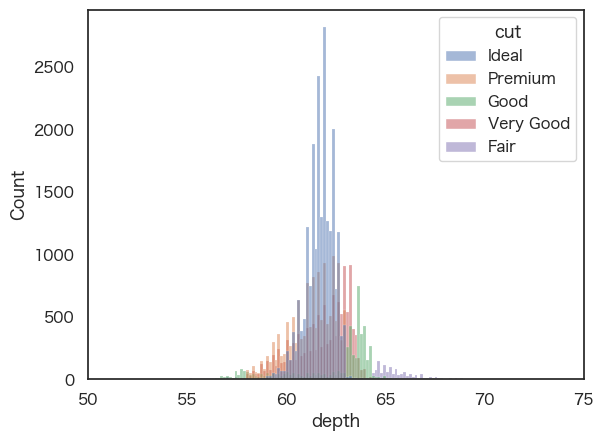

In [204]:
sns.histplot(data=df, x='depth', hue='cut', bins=250)
plt.xlim([50, 75])

# Pairplot

In [175]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


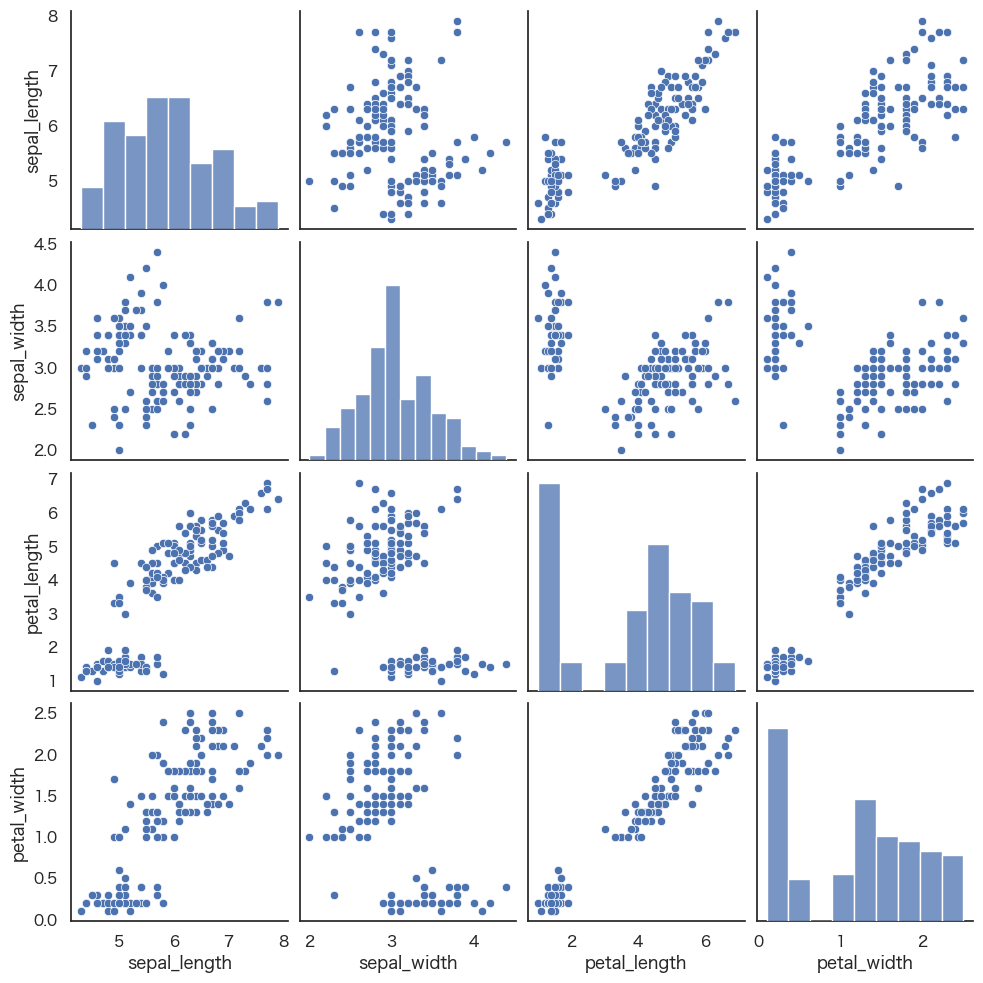

In [177]:
sns.pairplot(iris)
plt.show()

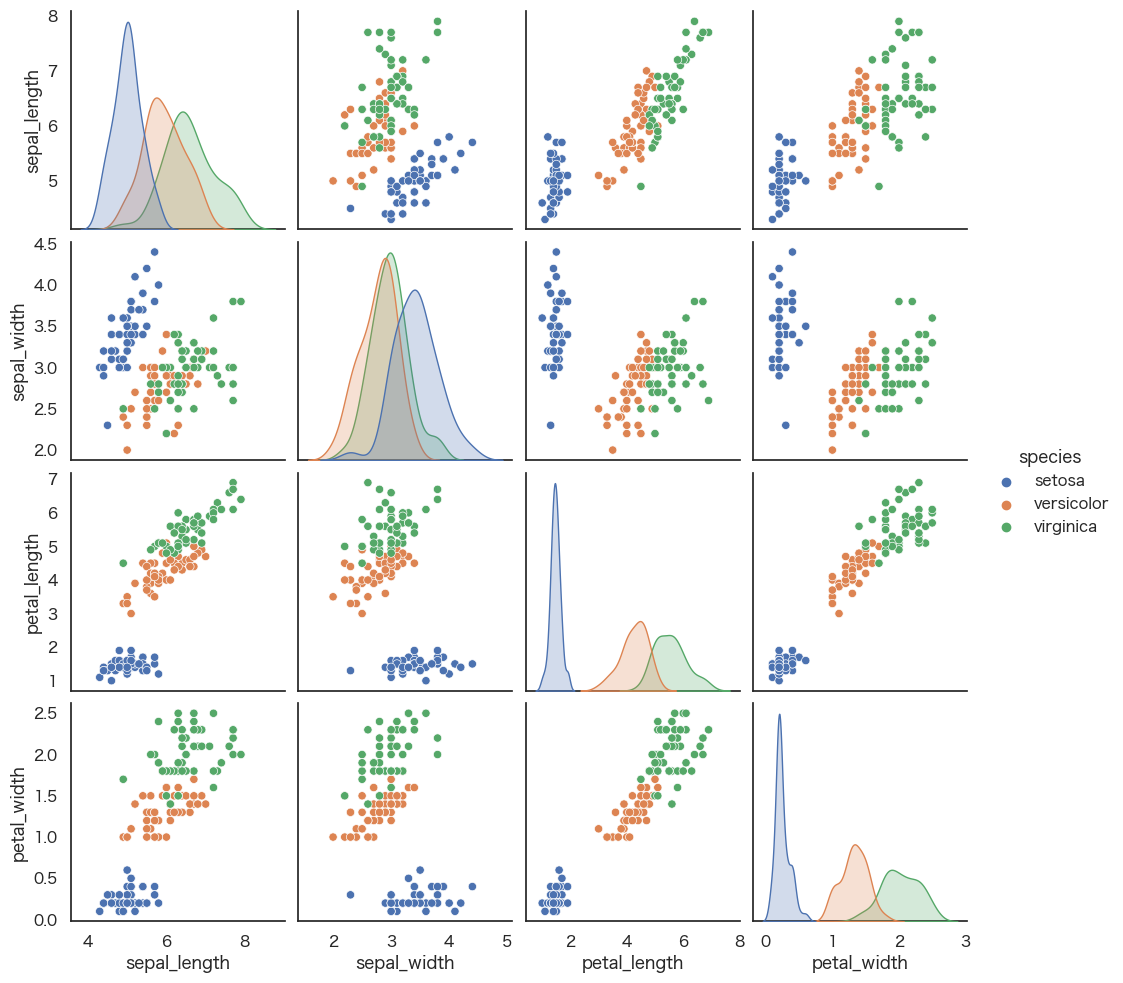

In [179]:
sns.pairplot(data=iris, hue='species')
plt.show()

# 等高線

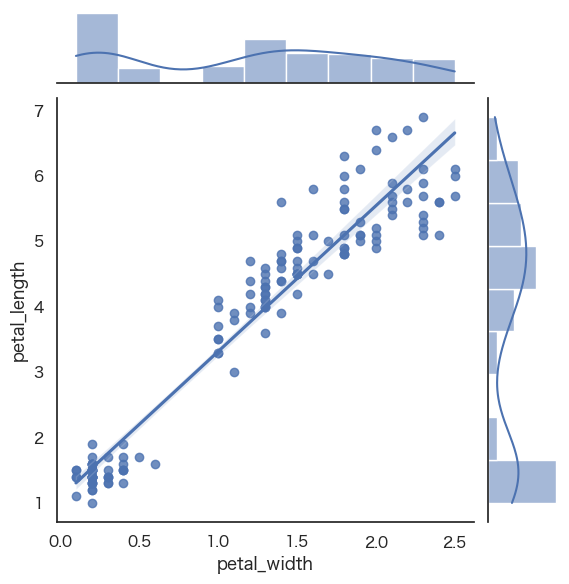

In [184]:
sns.jointplot(x='petal_width', y='petal_length', data=iris, kind='reg')
plt.show()